In [ ]:
#Stock Price Predictor

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
#Reading data
df = pd.read_csv('1767133-1729258-1613615-Stock_Price_data_set_(1).csv')

In [ ]:
#Displaying first five enteries
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
#Displaying last
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
#Displaying whole dataset (first five and last five)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
#Information about data to detect null values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
#Getting the number of trading days
df.shape

(1009, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [ ]:
#Splitting the data into training and testing dataset
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
#A function to craete datasets
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
#Training and testing data
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
#reshaping data to make it a 3D array in order to use it in LSTM Layer.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Model Building
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
#reshaping for LSTM Layer
_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Compling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#Training the model
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0062
Epoch 2/50
24/24 [==============================] - 1s 60ms/step - loss: 0.0058
Epoch 3/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0057
Epoch 4/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0055
Epoch 5/50
24/24 [==============================] - 1s 58ms/step - loss: 0.0064
Epoch 6/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0054
Epoch 7/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0056
Epoch 8/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0050
Epoch 9/50
24/24 [==============================] - 1s 59ms/step - loss: 0.0054
Epoch 10/50
24/24 [==============================] - 1s 58ms/step - loss: 0.0049
Epoch 11/50
24/24 [==============================] - 1s 58ms/step - loss: 0.0052
Epoch 12/50
24/24 [==============================] - 1s 58ms/step - loss: 0.0049
Epoch 13/50
24/24 [==================

In [ ]:
#Loading the trained model
model = load_model('stock_prediction.h5')

5/5 [==============================] - 0s 22ms/step


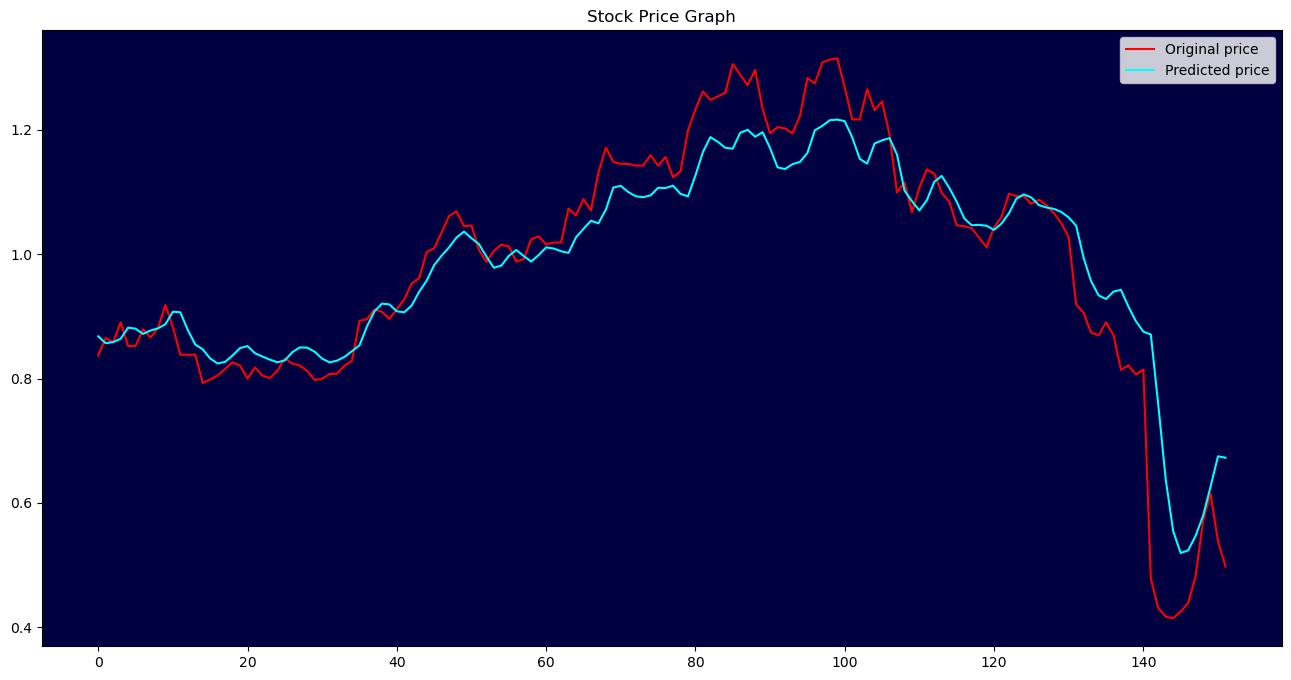

In [ ]:
#Prediction Making and Data Visualization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.title("Stock Price Graph")
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()